* Linear regression is a method for modeling the relationship between one or more independent variables and a dependent variable.
* It is a staple of statistics and is often considered a good introductory machine learning method.
* It is also a method that can be reformulated using matrix notation and solved using matrix operations.

# 1. What is Linear Regression?

Linear regression is a method for modeling the relationship between two scalar values: the input variable $x$ and the output variable $y$. The model assumes that $y$ is a linear function or a weighted sum of the input variable.
<br><br>
\begin{equation*}
y = f(x)
\end{equation*}
<br><br>
Or, stated with the coefficients.
<br><br>
\begin{equation*}
y = b_{0} + b_{1} \times x
\end{equation*}
<br><br>
The model can also be used to model an output variable given multiple input variables called multivariate linear regression (below, brackets were added for readability).
<br><br>
\begin{equation*}
y = b_{0} + (b_{1} \times x_{1}) + (b_{2} \times x_{2}) + \cdots
\end{equation*}
<br><br>
The objective of creating a linear regression model is to find the values for the coefficient values ($b$) that minimize the error in the prediction of the output variable $y$.

# 2. Matrix Formulation of Linear Regression

Linear regression can be stated using Matrix notation; for example:
<br><br>
\begin{equation*}
y = X \cdot b
\end{equation*}
<br><br>
Or, without the dot notation.
<br><br>
\begin{equation*}
y = Xb
\end{equation*}
<br><br>
Where $X$ is the input data and each column is a data feature, $b$ is a vector of coefficients and $y$ is a vector of output variables for each row in $X$.
<br><br>
\begin{equation*}
X =  \begin{vmatrix}
x_{1,1} & x_{1,2} & x_{1,3} \\
x_{2,1} & x_{2,2} & x_{2,3} \\
x_{3,1} & x_{3,2} & x_{3,3} \\
x_{4,1} & x_{4,2} & x_{4,3} 
\end{vmatrix}
\end{equation*}
<br><br>
\begin{equation*}
b =  \begin{vmatrix}
b_{1} \\
b_{2} \\
b_{3} 
\end{vmatrix}
\end{equation*}
<br><br>
\begin{equation*}
y =  \begin{vmatrix}
y_{1} \\
y_{2} \\
y_{3} \\
y_{4} 
\end{vmatrix}
\end{equation*}
<br><br>
* Reformulated, the problem becomes a system of linear equations where the $b$ vector values are unknown. This type of system is referred to as overdetermined because there are more equations than there are unknowns, i.e. each coefficient is used on each row of data. 
* It is a challenging problem to solve analytically because there are multiple inconsistent solutions, e.g. multiple possible values for the coefficients. 
* Further, all solutions will have some error because there is no line that will pass nearly through all points, therefore the approach to solving the equations must be able to handle that. 
* The way this is typically achieved is by finding a solution where the values for b in the model minimize the squared error. This is called linear least squares.
<br><br>
\begin{equation*}
\| X \cdot b - y \|^{2} = \sum_{i=1}^{m} \sum_{j=1}^{n} X_{ij} \cdot (b_{j} - y_{i})
\end{equation*}
<br><br>
This formulation has a unique solution as long as the input columns are independent (e.g. uncorrelated).
<br><br>
In matrix notation, this problem is formulated using the so-named normal equation:<br><br>
<br><br>
\begin{equation*}
X^{T} \cdot X \cdot b  = X^{T} \cdot y
\end{equation*}
<br><br>
This can be re-arranged in order to specify the solution for b as:
<br><br>
\begin{equation*}
 b  = (X^{T} \cdot X)^{-1} \cdot X^{T} \cdot y
\end{equation*}
<br><br>
This can be solved directly, although given the presence of the matrix inverse can be numerically challenging or unstable.

# 3. Linear Regression Dataset

* In order to explore the matrix formulation of linear regression, let's first define a dataset as a context.
* We will use a simple 2D dataset where the data is easy to visualize as a scatter plot and models are easy to visualize as a line that attempts to fit the data points.
* The example below defines a $5 \times 2$ matrix dataset, splits it into $X$ and $y$ components, and plots the dataset as a scatter plot.

[[0.05 0.12]
 [0.18 0.22]
 [0.31 0.35]
 [0.42 0.38]
 [0.5  0.49]]
[0.05 0.18 0.31 0.42 0.5 ]
[0.12 0.22 0.35 0.38 0.49]
[[0.05]
 [0.18]
 [0.31]
 [0.42]
 [0.5 ]]


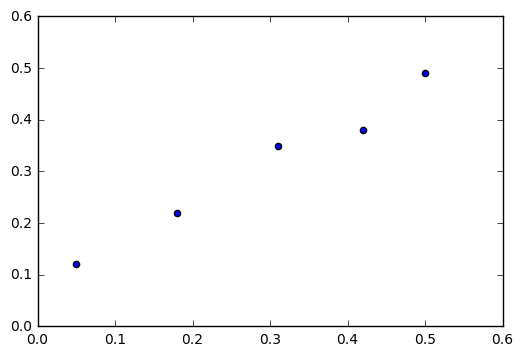

In [2]:
# linear regression dataset
from numpy import array
from matplotlib import pyplot
# define dataset
data = array([
[0.05, 0.12],
[0.18, 0.22],
[0.31, 0.35],
[0.42, 0.38],
[0.5, 0.49]])
print(data)
# split into inputs and outputs
X, y = data[:,0], data[:,1]
print(X)
print(y)
X = X.reshape((len(X), 1))
print(X)
# scatter plot
pyplot.scatter(X, y)
pyplot.show()

# 4. Solve via Inverse

* The first approach is to attempt to solve the regression problem directly using the matrix inverse.
* That is, given $X$, what are the set of coefficients $b$ that when multiplied by $X$ will give $y$. As we saw in a previous section, the normal equations define how to calculate $b$ directly.
<br><br>
\begin{equation*}
 b  = (X^{T} \cdot X)^{-1} \cdot X^{T} \cdot y
\end{equation*}
<br><br>
This can be calculated directly in NumPy using the inv() function for calculating the matrix inverse as $b = inv(X.T.dot(X)).dot(X.T).dot(y)$
<br>
Once the coefficients are calculated, we can use them to predict outcomes given $X$.i.e. $yhat = X.dot(b)$

[1.00233226]


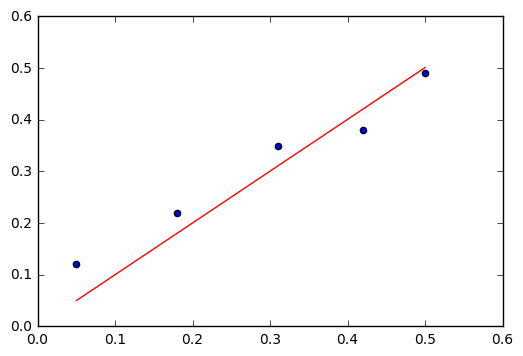

In [3]:
# direct solution to linear least squares
from numpy import array
from numpy.linalg import inv
from matplotlib import pyplot
# define dataset
data = array([
[0.05, 0.12],
[0.18, 0.22],
[0.31, 0.35],
[0.42, 0.38],
[0.5, 0.49]])
# split into inputs and outputs
X, y = data[:,0], data[:,1]
X = X.reshape((len(X), 1))
# linear least squares
b = inv(X.T.dot(X)).dot(X.T).dot(y)
print(b)
# predict using coefficients
yhat = X.dot(b)
# plot data and predictions
pyplot.scatter(X, y)
pyplot.plot(X, yhat, color='red')
pyplot.show()

A problem with this approach is the matrix inverse that is both computationally expensive and numerically unstable. An alternative approach is to use a matrix decomposition to avoid this operation.

# 5. Solve via QR Decomposition

The QR decomposition is an approach of breaking a matrix down into its constituent elements.
<br><br>
\begin{equation*}
 A = Q \cdot R
\end{equation*}
<br><br>
Where $A$ is the matrix that we wish to decompose, $Q$ a matrix with the size $m \times m$, and $R$ is an upper triangle matrix with the size $m \times n$. The QR decomposition is a popular approach for solving the linear least squares equation. Stepping over all of the derivation, the coefficients can be found using the $Q$ and $R$ elements as follows:
<br><br>
\begin{equation*}
 b  = R^{-1} \cdot Q^{T} \cdot y
\end{equation*}
<br><br>
The approach still involves a matrix inversion, but in this case only on the simpler $R$ matrix. The QR decomposition can be found using the $qr()$ function in NumPy. The calculation of the coefficients in NumPy looks as follows:
<br>
QR decomposition:
<br>
Q, R = qr(X)
<br>
b = inv(R).dot(Q.T).dot(y)

[1.00233226]


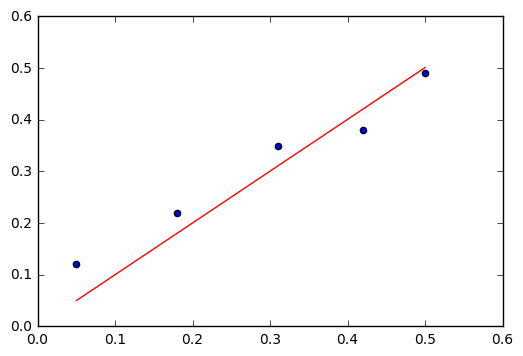

In [4]:
# QR decomposition solution to linear least squares
from numpy import array
from numpy.linalg import inv
from numpy.linalg import qr
from matplotlib import pyplot
# define dataset
data = array([
[0.05, 0.12],
[0.18, 0.22],
[0.31, 0.35],
[0.42, 0.38],
[0.5, 0.49]])
# split into inputs and outputs
X, y = data[:,0], data[:,1]
X = X.reshape((len(X), 1))
# factorize
Q, R = qr(X)
b = inv(R).dot(Q.T).dot(y)
print(b)
# predict using coefficients
yhat = X.dot(b)
# plot data and predictions
pyplot.scatter(X, y)
pyplot.plot(X, yhat, color='red')
pyplot.show()

The QR decomposition approach is more computationally efficient and more numerically stable than calculating the normal equation directly, but does not work for all data matrices.

# 6. Solve via SVD and Pseudoinverse

The Singular-Value Decomposition, or SVD for short, is a matrix decomposition method like the QR decomposition.
<br><br>
\begin{equation*}
 X  = U \cdot \Sigma \cdot V^{T}
\end{equation*}
<br>
* Where $A$ is the real $n \times m$ matrix that we wish to decompose, $U$ is a $m \times m$ matrix, $\Sigma$ (often represented by the uppercase Greek letter Sigma) is an $m \times n$ diagonal matrix, and $V^{T}$ is the transpose of an $n \times n$ matrix.
* Unlike the QR decomposition, all matrices have a singular-value decomposition.
* As a basis for solving the system of linear equations for linear regression, SVD is more stable and the preferred approach.
* Once decomposed, the coefficients can be found by calculating the pseudoinverse of the input matrix $X$ and multiplying that by the output vector $y$.
<br><br>
\begin{equation*}
 b  = X^{+} \cdot y
\end{equation*}
<br><br>
Where the pseudoinverse $X^{+}$ is calculated as following:
<br><br>
\begin{equation*}
 X^{+}  = U \cdot D^{+} \cdot V^{T}
\end{equation*}
<br>
Where $X^{+}$ is the pseudoinverse of $X$ and the $+$ is a superscript, $D^{+}$ is the pseudoinverse of the diagonal matrix $\Sigma$ and $V^{T}$ is the transpose of $V$ . NumPy provides the function pinv() to calculate the pseudoinverse directly. The complete example is listed below.

[1.00233226]


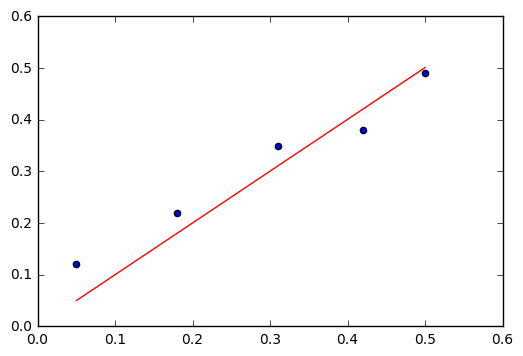

In [5]:
# SVD solution via pseudoinverse to linear least squares
from numpy import array
from numpy.linalg import pinv
from matplotlib import pyplot
# define dataset
data = array([
[0.05, 0.12],
[0.18, 0.22],
[0.31, 0.35],
[0.42, 0.38],
[0.5, 0.49]])
# split into inputs and outputs
X, y = data[:,0], data[:,1]
X = X.reshape((len(X), 1))
# calculate coefficients
b = pinv(X).dot(y)
print(b)
# predict using coefficients
yhat = X.dot(b)
# plot data and predictions
pyplot.scatter(X, y)
pyplot.plot(X, yhat, color='red')
pyplot.show()

# 7. Solve via Convenience Function

* The pseudoinverse via SVD approach to solving linear least squares is the de facto standard. This is because it is stable and works with most datasets.
* NumPy provides a convenience function named $lstsq()$ that solves the linear least squares function using the SVD approach.
* The function takes as input the $X$ matrix and $y$ vector and returns the $b$ coefficients as well as residual errors, the rank of the provided $X$ matrix and the singular values.
The example below demonstrate the $lstsq()$ function on the test dataset.

[1.00233226]


C:\Users\KRISHNA\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  app.launch_new_instance()


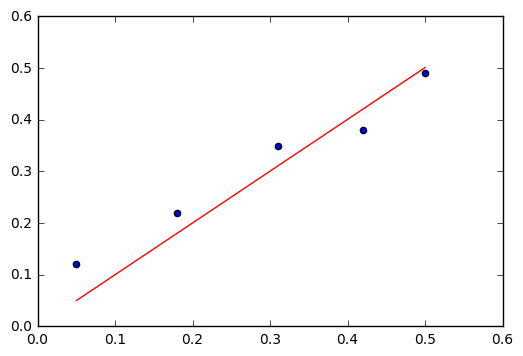

In [6]:
# least squares via convenience function
from numpy import array
from numpy.linalg import lstsq
from matplotlib import pyplot
# define dataset
data = array([
[0.05, 0.12],
[0.18, 0.22],
[0.31, 0.35],
[0.42, 0.38],
[0.5, 0.49]])
# split into inputs and outputs
X, y = data[:,0], data[:,1]
X = X.reshape((len(X), 1))
# calculate coefficients
b, residuals, rank, s = lstsq(X, y)
print(b)
# predict using coefficients
yhat = X.dot(b)
# plot data and predictions
pyplot.scatter(X, y)
pyplot.plot(X, yhat, color='red')
pyplot.show()